In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pca import pca
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
# for testing different models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, ShuffleSplit
# Cross testing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight



from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# DS3 Supervised learning - Final Assignment

## Background

The selected dataset is a [divorce predictor data set](http://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#) that was used to construct a neural network used to predict whether a divorce would happen ([See article](https://dergipark.org.tr/en/pub/nevsosbilen/issue/46568/549416)). A questionnaire containing 54 questions was filled in by 170 participants, wheras 84 (49%) were divorced and 86 (51%) were married couples. Using this data a model will be generated that can predict the chances of divorce.

## Data exploration

In [2]:
# data from http://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#
# read in the data
df = pd.read_csv('data/divorce.csv', sep=';')
print(df.shape)  # print data shape
df.head()  # print first five rows

(170, 55)


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


There are 170 samples, where each sample has 54 features. This is a rather large number and preferably should become smaller if possible.

In [3]:
# describe the dataset
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


As previously stated, there are 54 questions and according to the above table the answers seem to be answered on a scale from 0-4. The final column (class) holds only 1's and 0's and tell whether a divorce happened or not. Thus, there is no need to normalize this data as it all in in the same range and the final column is only a label.

In [4]:
# There do not seem to be any missing values in the data
df.isna().sum().sum()

0

To view the distribution of the answers, a histograms and boxplots were generated in the next steps.

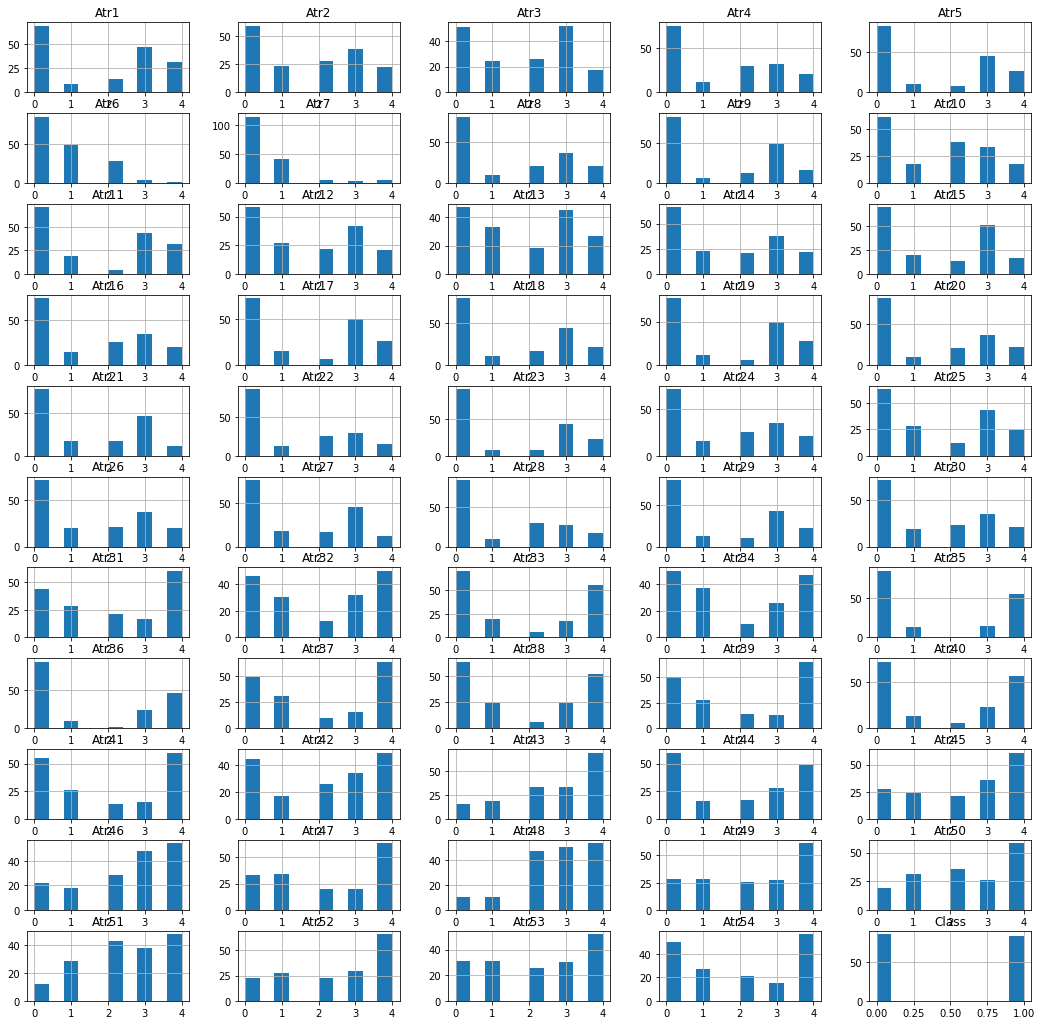

In [5]:
# To view the distribution of the data, for each question a histogram is generated
fig, axis = plt.subplots(11,5,figsize=(18, 18))
df.hist(ax=axis)
plt.show()

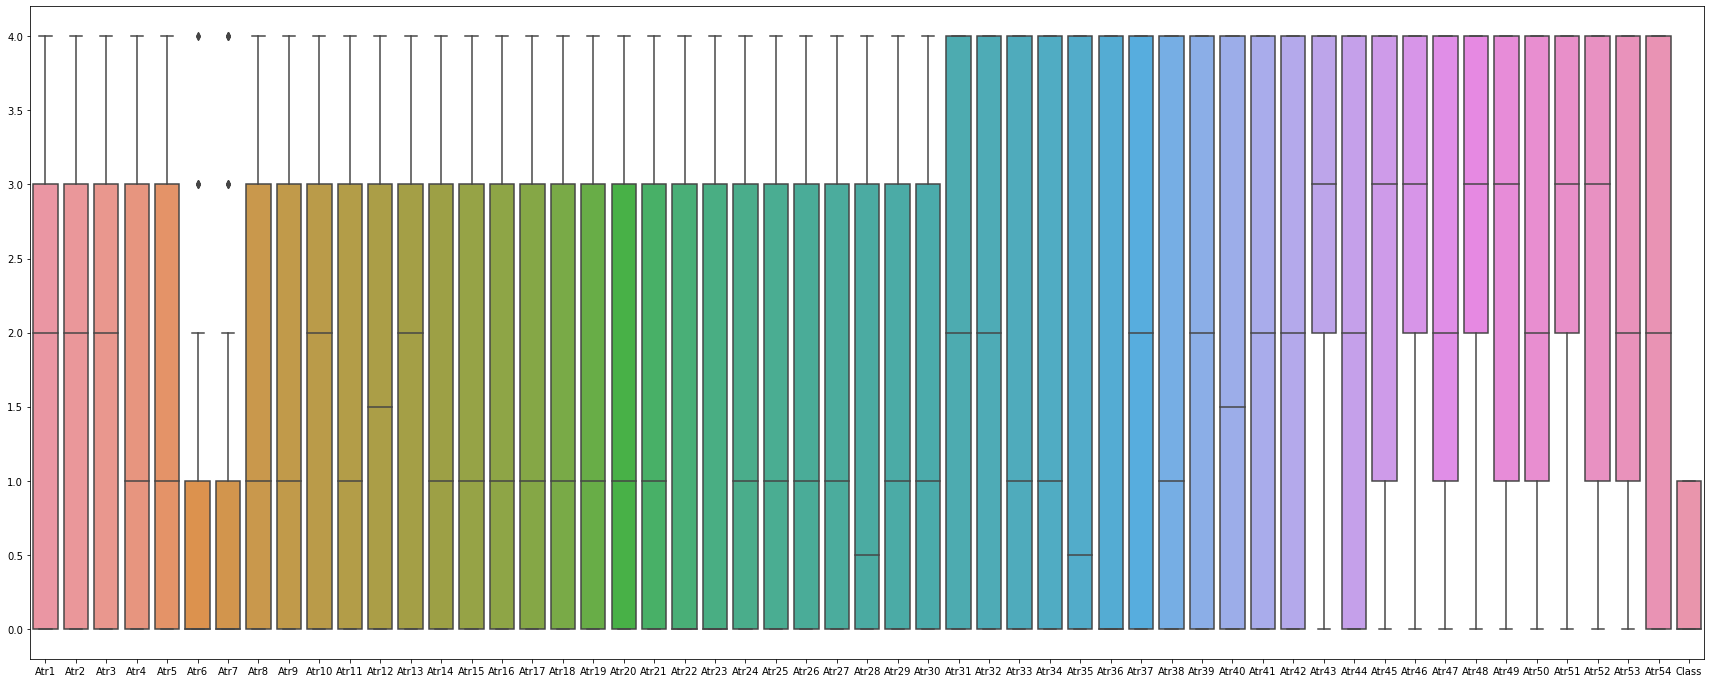

In [6]:
plt.figure(figsize=(30,12))
sns.boxplot(data=df)
plt.show()

According to the above plots, nothing in particular stands out. The data seems to be distributed randomly. Additionally, considering the number of features, it is very difficult to say anything about this data.

## Cleaning the data

According to the paper which used this data, divorce was explained in large part by 6 features. Thus, to reduce dimensionality a PCA will be performed to determine the most important features. This subselection will be then used to train the model.

In [7]:
# We do not need the labels (Divorce, no divorce)
df_unlabeled = df.drop('Class', axis=1)
# Save divorce labels in a different variable
divorce_label = df['Class']

In [8]:
# Creating model which considers 6 components, no normalization necessary due to data being in the same scale.
model = pca(n_components=5, normalize=False)
results = model.fit_transform(df_unlabeled)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [54] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


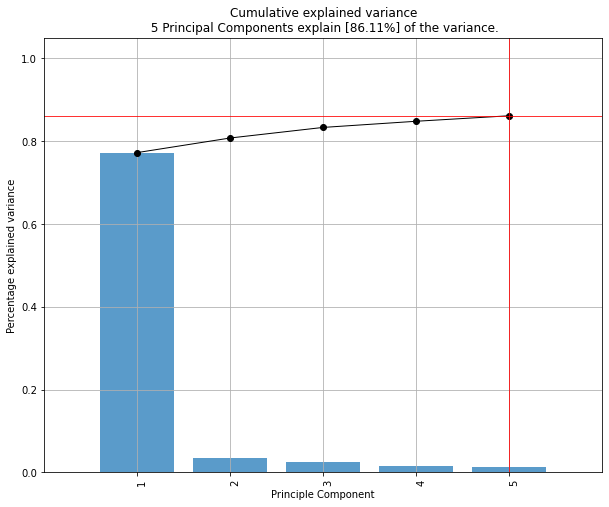

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot the model to see how much is explained by how many principal components
model.plot(figsize=(10,8))
plt.show()

The above plot suggests a single component already seems to be sufficient to explain about 80% of all data. With 5 components, circa 86% of the variance in the dataset is explained. For further insight a biplot will be generated to observe the most important features. The paper claims that the divorces are mainly explained by 6 features, thus we'll use this value.

[pca] >Plot PC1 vs PC2 with loadings.


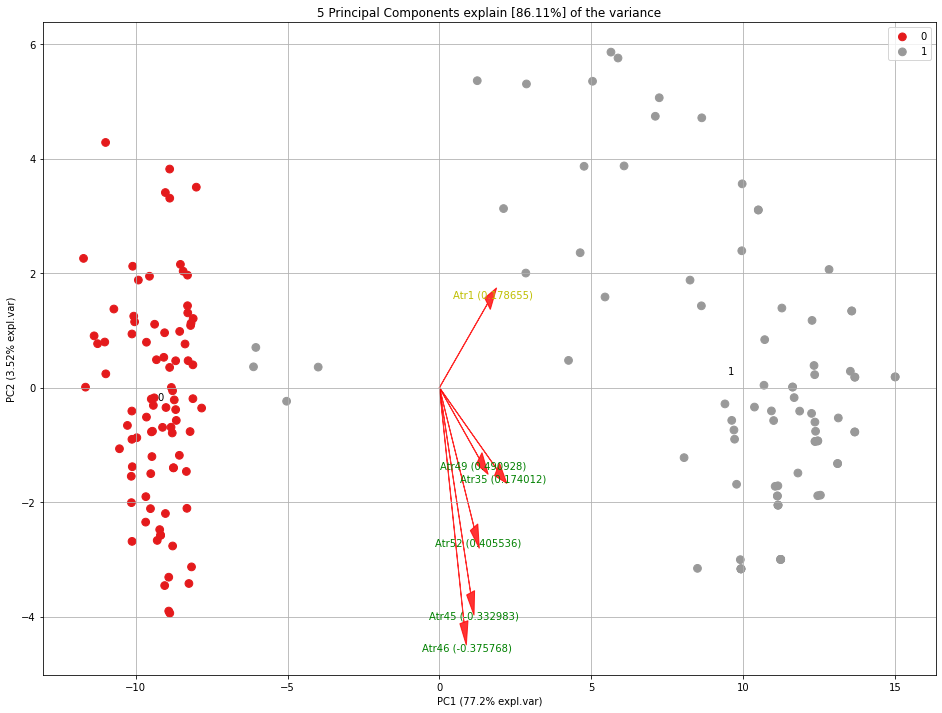

In [10]:
# show the top 6 features in a biplot
model.biplot(n_feat=6,  legend=True, figsize=(16,12), y=divorce_label, label=True)
plt.show()

According to the biplot, the main features to responsible for a couple having a divorce or not seem to be: 'Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52'.

Both groups seem to be split very well along PC1 with a few outliers closer to the non-divorced group. There also seems to be a little more variation within the divorced group than the non-divorced group.

In [11]:
# In the selection we include the 6 features and the labels
df_select = df[['Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52', 'Class']]
df_select.head()

,Atr1,Atr35,Atr45,Atr46,Atr49,Atr52,Class
0,2,0,3,2,3,3,1
1,4,0,2,2,4,4,1
2,2,1,2,3,1,2,1
3,3,1,3,2,3,2,1
4,2,0,2,2,3,2,1


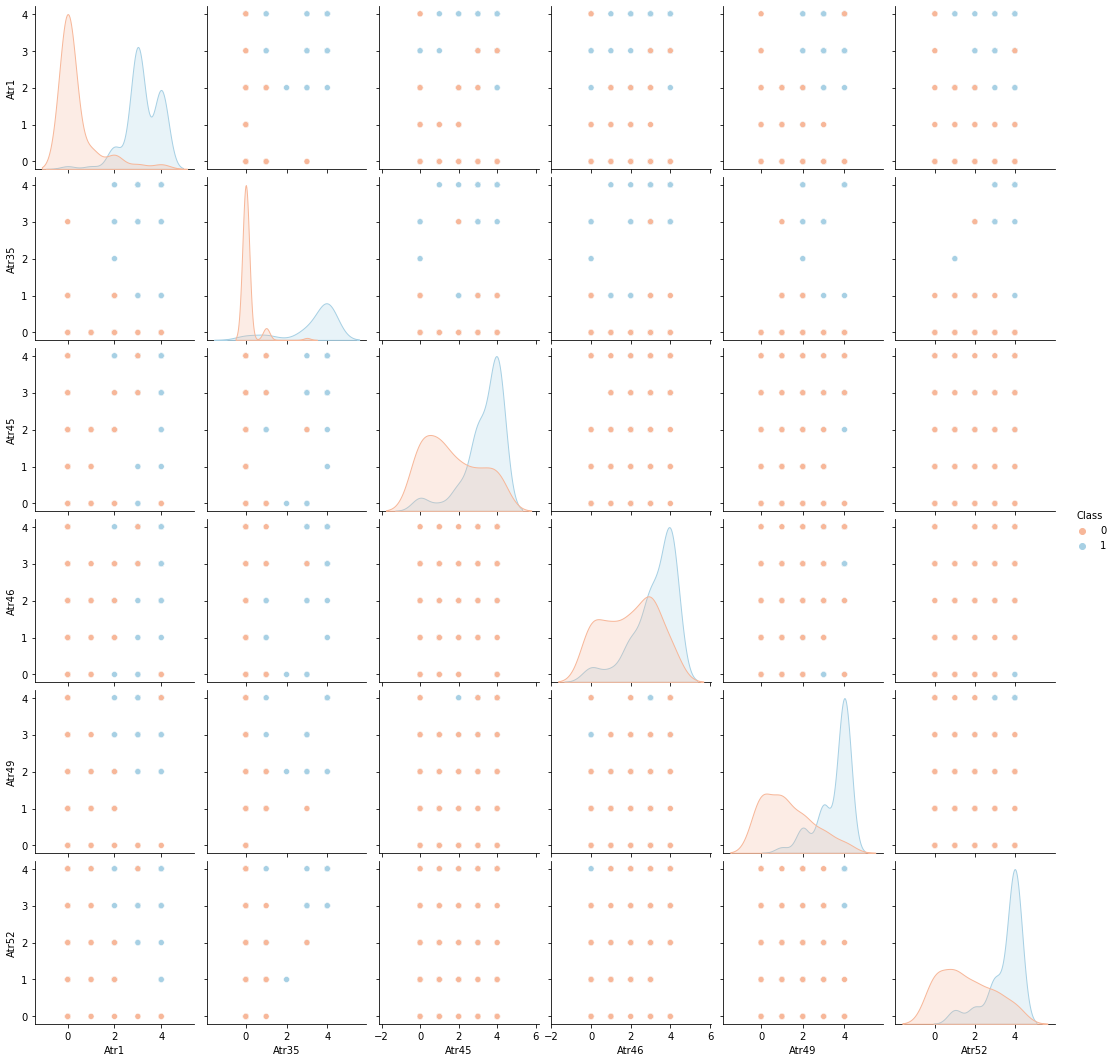

In [12]:
# To view the distribution of this selection, a pairplot is generated
sns.pairplot(data=df_select, hue='Class', palette='RdBu')

For most of the features, there seems to be a clear distinction between both groups with some overlay.

## Creating a simple model

In [20]:
cols = ['Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52']  # column selection
y = np.array(df['Class'])  # Store outcome in an array
X = np.array(df[cols])  # Store selected columns in an array
print(X.shape)  # print the shape

(170, 6)


In [21]:
# Split the data in train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [22]:
# Train the model using Logistic regression
logreg = LogisticRegression()
history = logreg.fit(X_train, y_train)

In [23]:
# Evaluate the trained model using the test data.
y_pred = logreg.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
# print the confusion matrix to view how correct the model works.
print ('=== [confusion matrix] ==='.center(54))
print(confusion_m)
print ('')
print ('=== [classification report] ==='.center(54))
print(classification_report(y_test, y_pred))

              === [confusion matrix] ===              
[[22  1]
 [ 2 18]]

           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.95      0.90      0.92        20

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43



In [24]:
# Print the coefficient for the model
print('Coefficients', logreg.coef_)
# print the mean squared error to see how correct the model is.
print('MSE: ', mean_squared_error(y_test, y_pred, squared=False))

Coefficients [[ 0.92000689  1.68651494  0.25699269 -0.16320335  0.75707547  0.471394  ]]
MSE:  0.26413527189768715


## Comparing multiple classifiers

Different machine learning algorithms will be used to determine the best fit for this dataset. The algorithms are the ones that follow (Information taken from [towardsdatascience](https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0)):
* Logistic Regression: basic linear classifier
* Random Forest: ensemble bagging classifier
* K-Nearest Neighbors: instance based classifier
* Support Vector Machines: maximum margin classifier
* Gaussian Naive Bayes: probabilistic classifier
* XGBoost: ensemble boosting classifier

In [25]:
def run_exps(X_train, y_train, X_test, y_test):
    '''
    Tests several common models to verify which one functions best for given data
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    # create lists which are used in loop
    dfs = []
    models = [
        ('LogReg', LogisticRegression()),
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('GNB', GaussianNB()),
        ('XGB', XGBClassifier())]
    
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['0', '1']
    
    # loop through models, assessing several parameters
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # print parameters
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        
        # create df and append to dfs
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)

    # concatenate dfs and return final dataframe
    final = pd.concat(dfs, ignore_index=True)
    return final

In [26]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.95      0.90      0.92        20

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43

RF
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.95      0.90      0.92        20

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43

KNN
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.95      0.90      0.92        20

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43

SVM
 

Observing precision, recall and f1-score most values seem to be above 0.9 and some even 1.0. This suggests the models fit the data very well.

In [27]:
# perform bootstrapping with the different classifiers to verify which one is the best
bootstraps = []
# loop through models
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

# create dataframe containing the information
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## Performance metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## Time metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

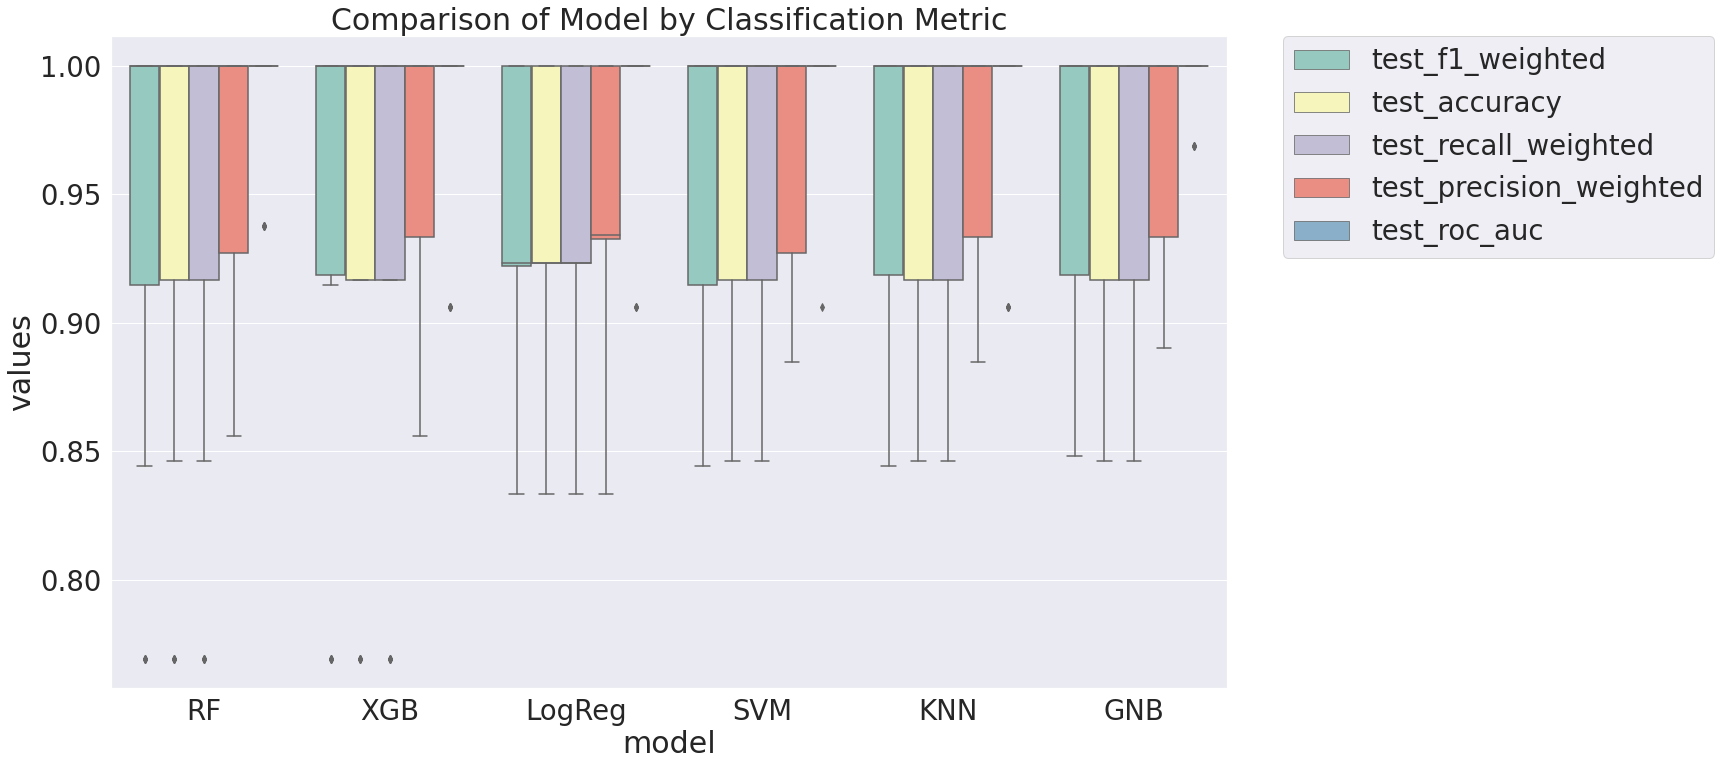

In [28]:
# plot comparison of models by different classification metrics
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

After running this script several times(due to the randomness in the selection), LogReg seems to usually vary wildly, ranging from around 0.8 to 1.0. 

KNN and XGB in particular seem to usually stay above 0.9 and come very close to 1.0. SVM and RF usually behave similarly, however have a far larger variation.

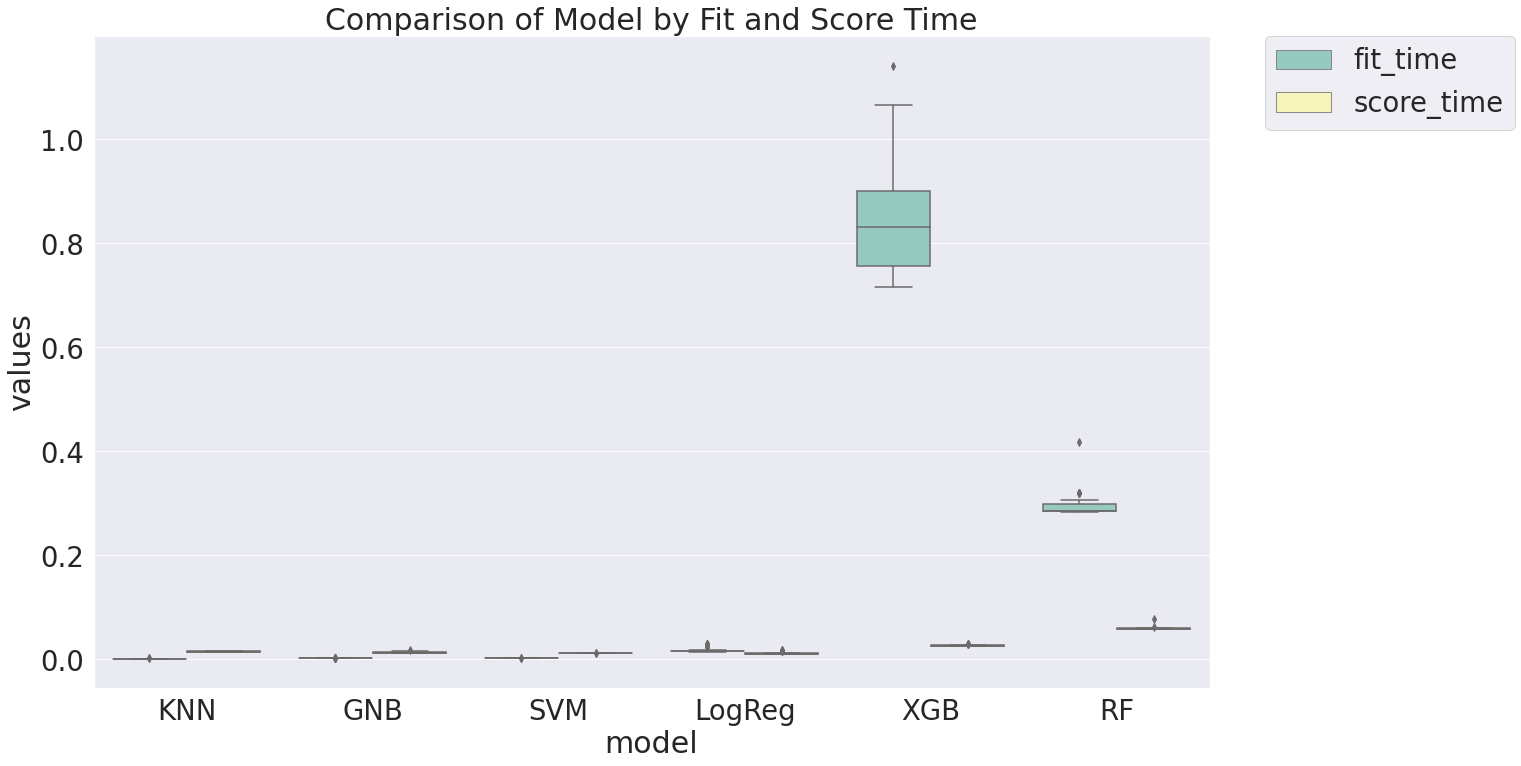

In [29]:
# plot comparison of models by fit and score time
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

After running this script several times, KNN, GNB, SVM and LogReg seem to always have a very low fit and time value (close to zero). XGB and RF however seem to take a lot longer.

According to the comparison by classification metrics, KNN, XGB, SVM and RF seemed to be the better choices. However, considering the fit and score time, XGB and RF could better be dripped due to the relatively slow time. Leaving KNN and SVM to construct a model.

## Hyperparameter tuning
### [SVM](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/)

In [30]:
# train the model on train set
svm = SVC()
svm.fit(X_train, y_train)
 
# print prediction results
predictions_svm = svm.predict(X_test)
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.90      0.95        20

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



In [31]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.808 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.808 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.962 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.962 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.97


In [33]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.90      0.95        20

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



### [KNN](https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f)

In [35]:
#Train KNN model.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
# print prediction results
predictions_knn = knn.predict(X_test)
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.95      0.90      0.92        20

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43



In [37]:
# defining parameter range
leaf_size = list(range(1,50, 1))
n_neighbors = list(range(1,30, 1))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p) 

#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [41]:
print("The best parameters are %s with a score of %0.2f"
      % (best_model.best_estimator_.get_params(), best_model.best_score_))

The best parameters are {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} with a score of 0.98


The optimal parameters seem to be leaf_size: 1, p: 2 and n_neighbors: 2.

In [38]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.90      0.95        20

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43

